In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

from c_impute import cImpute

import c_impute.utils as ut
from c_impute.plotting import plot_settings, plot_hist, plot_scatter

In [2]:
# Settings
plot_settings()
groups = ["A", "B", "C", "D", "E", "F"]
str_lfq = "log2 LFQ "
str_ids = "Protein IDs"

# Creat imputation object
cimp = cImpute(str_id=str_ids, str_lfq=str_lfq)

In [3]:
# Load data
file = "raw_data_proteomics_lfq.xlsx"
df_raw = pd.read_excel(ut.FOLDER_DATA + file)
dict_group_cols = cimp.get_dict_groups(df=df_raw, groups=groups)
all_groups_col = cimp.get_all_group_cols(dict_group_cols=dict_group_cols)

In [4]:
# Imputation
loc_up_mnar = 0.2
d_min, up_mnar, d_max = cimp.get_limits(df=df_raw.copy(),
                                        dict_group_cols=dict_group_cols,
                                        loc_up_mnar=loc_up_mnar)
df_imputed = cimp.run(df=df_raw.copy(),
                          dict_group_cols=dict_group_cols,
                          min_cs=0.5,
                          loc_up_mnar=loc_up_mnar,
                          std_factor=0.8,
                          n_neigbhors=6)
display(df_raw)
display(df_imputed)

,Protein IDs,log2 LFQ A_1,log2 LFQ A_2,log2 LFQ A_3,log2 LFQ A_4,log2 LFQ A_5,log2 LFQ A_6,log2 LFQ A_7,log2 LFQ A_8,log2 LFQ B_1,...,log2 LFQ E_6,log2 LFQ E_7,log2 LFQ E_8,log2 LFQ F_1,log2 LFQ F_2,log2 LFQ F_3,log2 LFQ F_4,log2 LFQ F_5,log2 LFQ F_6,log2 LFQ F_7
0,Protein0001,NaN,27.272221,25.922796,25.922432,25.277178,NaN,NaN,24.927731,NaN,...,23.768906,20.753361,25.682444,18.955008,14.841122,NaN,26.132320,18.388605,18.504051,NaN
1,Protein0002,NaN,22.973932,22.040863,22.421959,21.887550,NaN,NaN,NaN,19.368668,...,NaN,NaN,22.289402,NaN,NaN,18.723541,22.490717,NaN,19.065342,NaN
2,Protein0003,NaN,26.362188,26.277479,25.700308,26.063425,NaN,NaN,23.785065,NaN,...,22.482370,NaN,24.954735,NaN,17.709272,NaN,25.368429,NaN,NaN,NaN
3,Protein0004,NaN,24.622601,24.937551,24.028673,24.003332,NaN,NaN,22.179192,NaN,...,NaN,18.779694,23.625000,NaN,NaN,NaN,23.904903,NaN,NaN,NaN
4,Protein0005,NaN,26.373484,25.566917,24.636662,24.215416,NaN,NaN,24.307581,NaN,...,23.111446,18.772238,24.299429,20.258911,NaN,NaN,24.806562,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,Protein1985,NaN,21.802860,20.268993,NaN,20.865973,NaN,NaN,18.424601,NaN,...,NaN,NaN,NaN,NaN,19.074492,18.202038,NaN,NaN,NaN,NaN
1985,Protein1986,NaN,21.085827,20.012226,21.334127,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,Protein1987,NaN,21.494091,20.655870,21.144823,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,Protein1988,NaN,22.458338,22.068317,21.164228,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,21.489689,NaN,NaN,NaN,21.709650,NaN,NaN,NaN


,log2 LFQ A_1,log2 LFQ A_2,log2 LFQ A_3,log2 LFQ A_4,log2 LFQ A_5,log2 LFQ A_6,log2 LFQ A_7,log2 LFQ A_8,log2 LFQ B_1,log2 LFQ B_2,...,CS_C,CS_D,CS_E,CS_F,NaN_A,NaN_B,NaN_C,NaN_D,NaN_E,NaN_F
Protein IDs,,,,,,,,,,,,,,,,,,,,,
Protein0001,20.769350,27.272221,25.922796,25.922432,25.277178,21.212935,21.780364,24.927731,19.879334,20.325863,...,1.00,1.00,1.00,0.00,MCAR,MCAR,MCAR,MCAR,MCAR,MAR
Protein0002,21.386591,22.973932,22.040863,22.421959,21.887550,20.535161,21.680469,21.719430,19.368668,19.911213,...,1.00,0.38,0.62,0.43,MCAR,MCAR,MNAR,MCAR,MCAR,MCAR
Protein0003,22.210057,26.362188,26.277479,25.700308,26.063425,21.860414,21.848587,23.785065,NaN,NaN,...,1.00,0.75,0.88,0.29,MCAR,MCAR,MCAR,MCAR,MCAR,MCAR
Protein0004,21.224265,24.622601,24.937551,24.028673,24.003332,20.298384,21.968019,22.179192,12.530905,13.541495,...,0.00,0.00,0.75,0.14,MCAR,MNAR,MAR,MAR,MCAR,MCAR
Protein0005,20.634347,26.373484,25.566917,24.636662,24.215416,19.846755,20.807572,24.307581,NaN,NaN,...,0.00,0.88,1.00,0.29,MCAR,MAR,MAR,MCAR,MCAR,MCAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Protein1985,20.723994,21.802860,20.268993,21.103184,20.865973,20.572797,20.456413,18.424601,14.745812,12.865855,...,1.00,1.00,0.25,0.29,MCAR,MNAR,MNAR,MNAR,MCAR,MCAR
Protein1986,NaN,21.085827,20.012226,21.334127,NaN,NaN,NaN,NaN,14.954530,12.889441,...,1.00,1.00,1.00,1.00,MCAR,MNAR,MNAR,MNAR,MNAR,MNAR
Protein1987,NaN,21.494091,20.655870,21.144823,NaN,NaN,NaN,NaN,12.531917,13.343430,...,1.00,1.00,1.00,1.00,MCAR,MNAR,MNAR,MNAR,MNAR,MNAR


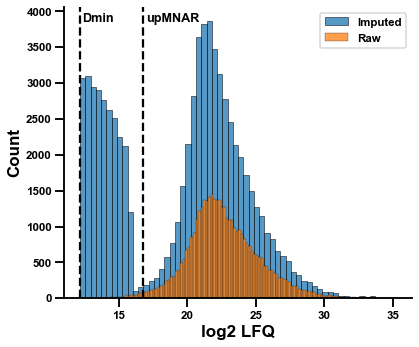

In [5]:
# Plot histogram
plot_hist(df_raw=df_raw,
          df_imputed=df_imputed,
          cols=all_groups_col,
          d_min=d_min,
          up_mnar=up_mnar)
plt.show()
plt.close()

<Figure size 432x504 with 0 Axes>

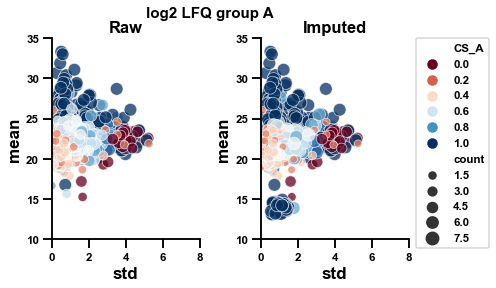

<Figure size 432x504 with 0 Axes>

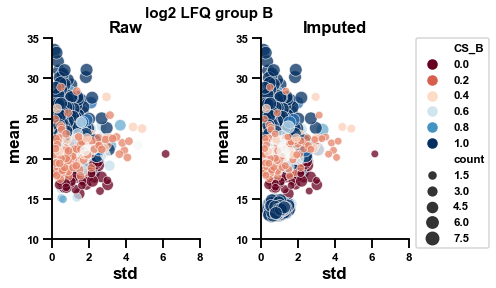

<Figure size 432x504 with 0 Axes>

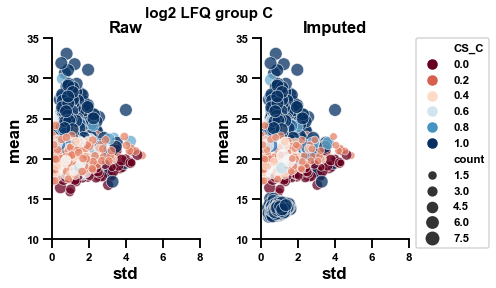

<Figure size 432x504 with 0 Axes>

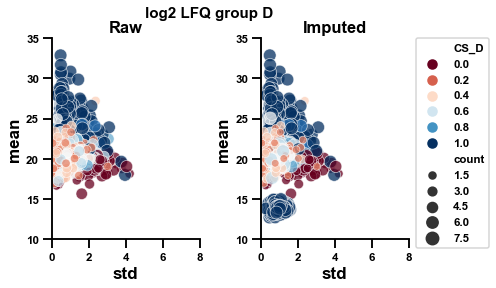

<Figure size 432x504 with 0 Axes>

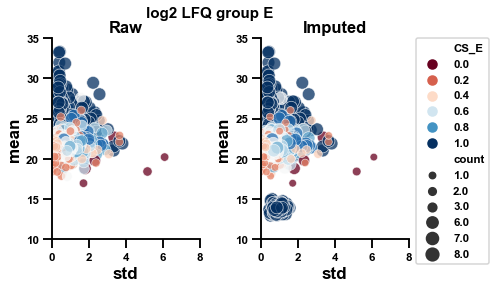

<Figure size 432x504 with 0 Axes>

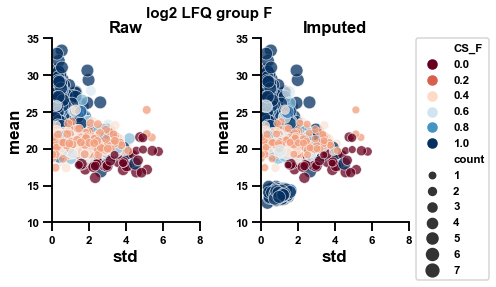

In [6]:
# Plot scatter plot for each group
df_raw_plot = df_raw.set_index(str_ids)
df_raw_plot = df_raw_plot.sort_index()
for group in dict_group_cols:
    cols = dict_group_cols[group]
    plot_scatter(df_raw=df_raw_plot, df_imputed=df_imputed, cols=cols, group=group)
    plt.show()
    plt.close()
